Questão 1. Considere a função f(x) = x3-2x+4 no intervalo [-2,2] com h = 0,25.
Use aproximações por diferenças finitas progressivas, regressivas e centradas
para a primeira e segunda derivadas de modo a ilustrar graficamente qual
aproximação é mais acurada. Faça o gráfico de todas as três aproximações por
diferenças finitas da primeira derivada com a derivada teórica e faça o mesmo
também para a segunda derivada.

In [2]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [3]:
function = lambda x: x**3 -2*x + 4
x0 = -2
x1 = 2
delta = 0.25
space = np.arange(x0, x1, delta)

In [4]:
def taylor(ordem, x, delta, val,derivadas):
    for n in range(0, ordem):
        val += derivadas[n % len(derivadas)](x) * (delta ** (n + 1)) / factorial(n + 1)
    return val

def erroVerdadeiro(valorVerdadeiro, valorAproximado):
    return valorVerdadeiro - valorAproximado

def erroRelativoPercentualVerdadeiro(valorVerdadeiro, valorAproximado):
    return abs(round(erroVerdadeiro(valorVerdadeiro, valorAproximado) / valorVerdadeiro * 100, 3))

In [5]:
derivadasCentrais = [diferencaCentradaPrimeiraOrdem(function,delta),diferencaCentradaSegundaOrdem(function,delta),diferencaCentradaTerceiraOrdem(function,delta),diferencaCentradaQuartaOrdem(function,delta)]
derivadasProgressivas = [diferencaProgressivaPrimeiraOrdem(function,delta),diferencaProgressivaSegundaOrdem(function,delta),diferencaProgressivaTerceiraOrdem(function,delta),diferencaProgressivaQuartaOrdem(function,delta)]
derivadasRegressivas = [diferencaRegressivaPrimeiraOrdem(function,delta),diferencaRegressivaSegundaOrdem(function,delta),diferencaRegressivaTerceiraOrdem(function,delta),diferencaRegressivaQuartaOrdem(function,delta)]

function_vals = [function(x) for x in space]
taylorCentralPrimeiraOrdem = [taylor(1, x0, delta, function(x),derivadasCentrais) for x in space]
taylorCentralSegundaOrdem = [taylor(2, x0, delta, function(x),derivadasCentrais) for x in space]
taylorProgressivoPrimeiraOrdem = [taylor(1, x0, delta, function(x),derivadasProgressivas) for x in space]
taylorProgressivoSegundaOrdem = [taylor(2, x0, delta, function(x),derivadasProgressivas) for x in space]
taylorRegressivoPrimeiraOrdem = [taylor(1, x0, delta, function(x),derivadasRegressivas) for x in space]
taylorRegressivoSegundaOrdem = [taylor(2, x0, delta, function(x),derivadasRegressivas) for x in space]

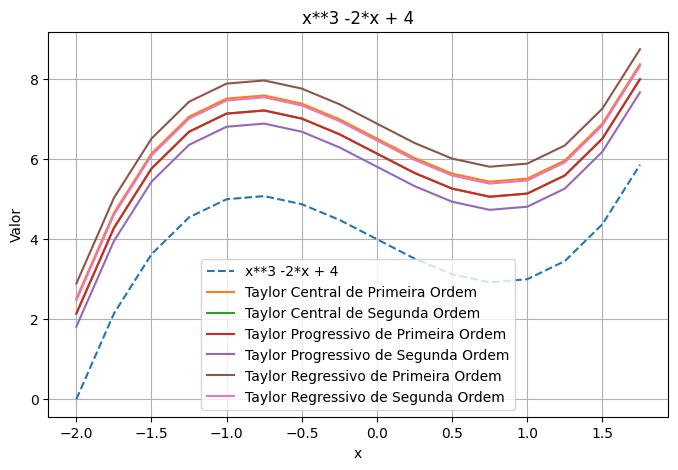

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(space, function_vals, label='x**3 -2*x + 4', linestyle='dashed')
plt.plot(space, taylorCentralPrimeiraOrdem, label=f'Taylor Central de Primeira Ordem', linestyle='solid')
plt.plot(space, taylorCentralSegundaOrdem, label=f'Taylor Central de Segunda Ordem', linestyle='solid')
plt.plot(space, taylorProgressivoPrimeiraOrdem, label=f'Taylor Progressivo de Primeira Ordem', linestyle='solid')
plt.plot(space, taylorProgressivoSegundaOrdem, label=f'Taylor Progressivo de Segunda Ordem', linestyle='solid')
plt.plot(space, taylorRegressivoPrimeiraOrdem, label=f'Taylor Regressivo de Primeira Ordem', linestyle='solid')
plt.plot(space, taylorRegressivoSegundaOrdem, label=f'Taylor Regressivo de Segunda Ordem', linestyle='solid')
plt.xlabel('x')
plt.ylabel('Valor')
plt.title('x**3 -2*x + 4')
plt.legend()
plt.grid()
plt.show()

Questão 2. Foram coletados os seguintes dados para a distância percorrida
em função do tempo para um foguete:
t, s 0 25 50 75 100 125
y, km 0 32 58 78 92 100
Use a derivação numérica para obter estimativas da velocidade e da aceleração
em cada instante.